
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<span style="font-size:28px"><b>Unsupervised Analysis Project </b></span><br><br>
<br>
<span style="font-size:24px"><b>Team 16</b></span><br>
<br>
<span style="font-size:14px">29/01/2021</span><br>
<br>

<br>
<span style="font-size:14px">Carolina Játiva, David Fakunle, Fabiola Farrera Fonseca, Kamakshi Madhok, William Molo <span><br>
 
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
   

<h2> Introduction</h2><br>
The following analysis has the objective to find aspects of consumer buying behavior in Hult Students when buying a laptop. The goal of the analysis is to interpret an unsupervised machine learning algorithm to obtain key insights for Apple, based on a survey done to 137 Hult Students. The survey covers 78 questions about Hult's Students personality, Hult DNA and demographics.

<h2>Part I: Data Preparation</h2><br>
Importing necessary packages, loading data, and setting display options. 

In [1]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca 
from sklearn.cluster         import KMeans  #new reduces dimensionality - groups them - PCAs
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
#new reduces dimensionality - groups them - PCAs


########################################
# loading data and setting display options
########################################
# loading data
survey= pd.read_excel('./survey_data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>User-Defined Functions</strong><br>

The following User-Defined Functions will be needed for this analysis. 
The Scree Plot will be used to show the number of PCAs that will be selected. 
The Inertia Plot will be used to show the number of KMeans Clusters that will be used.

In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/survey_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [3]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Data Exploration</strong><br>


In [4]:
#Checking the information of the dataset
#print(survey.info())

In [5]:
#Checking missing values
#survey.isnull().sum(axis=0).any()
#There are no missing values in the dataset

In [6]:
# summary of decriptive statistics
#survey.describe(include = 'number').round(decimals=2)

<strong>Insights:</strong><br>

Low Mean Answers to Questions:
 - Insult people:1.90. 
 - Do not have a good imagination:  2.30
 - Get upset easily: 2.30

High Mean Answers to Questions:
 - Drive for results: 4.4
 - Seek and use feedback from others:4.30



In [7]:
# displaying first ten rows of the dataset
#survey.head(n=10)

In [8]:
#Checking the number of columns and rows in the dataset
survey.shape

(137, 79)

In [9]:
#Distribution of laptop type that students currently have
survey['What laptop do you currently have?'].value_counts()
#Windows laptop is winning

Macbook           69
Windows laptop    68
Name: What laptop do you currently have?, dtype: int64

In [10]:
#Distribution of laptop type that students would buy
survey['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts()
#Macbook latop is winning

Macbook           77
Windows laptop    56
Chromebook         4
Name: What laptop would you buy in next assuming if all laptops cost the same?, dtype: int64

In [11]:
# Distribution of age
#survey['What is your age?'].value_counts()
#most students range around the 20s

In [12]:
#Distribution of ethnicity
#survey['What is your ethnicity?'].value_counts()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Feature Treatment and Engineering</strong><br>

<strong>Fixing Letter Casing in the column 'What is your nationality'?</strong><br>
Some students answered to this questions in different ways for some of the same nationalities,
so we standardized this by creating a dictionary that contained the errors that needed to be fixed

In [13]:
#Capitalizing all nationalities
survey['What is your nationality? '] = survey['What is your nationality? '].str.capitalize()

In [14]:
#Fixing the letter casing of nationalities 
#Creating a dictionary to be able to fix it
replaceable_names = {"Ecuador"             : "Ecuadorian",
                     "India"               : "Indian",
                     "Indian."             : "Indian",
                     "China"               : "Chinese",
                     "Japan"               : "Japanese",
                     "Costarrican"         : "Costa Rican",
                     "Usa"                 : "American",
                     "Philippines"         : "Filipino",
                     "Indonesia"           : "Indonesian",
                     "Germany"             : "German",
                     "Mauritius"           : "Mauritian",
                     "South korea"         : "South Korean",
                     "Korea"               : "South Korean",
                     "Republic of korea"   : "South Korean",
                     "German/american"     : "Multi-ethnic",
                     "Peru"                : "Peruvian",
                     "Brazil"              : "Brazilian",
                     "Russia"              : "Russian",
                     "Italian and spanish" : "Multi-ethnic",
                     "Colombia"            : "Colombian",
                     "Taiwan"              : "Taiwanese",
                     "British, indian"     : "Multi-ethnic",              
                     "Belarus"             : "Belarusian",
                     "Nigeria"             : "Nigerian",
                     "Panama"              : "Panamanian",
                     "Spain"               : "Spanish",
                     "Canada"              : "Canadian",
                     "Congolese (dr congo)": "Congolese",
                     "Czech republic"      : "Czech"
                    }

In [15]:
#Replacing the strings in the nationality column
survey['What is your nationality? '].replace(replaceable_names, inplace = True)

In [16]:
#Confirming the changes made
#survey['What is your nationality? '].value_counts()

<strong>Fixing Duplicate Columns in the Dataset</strong><br>
The columns 'Encourage direct and open discussions', "Take initiative even when circumstances,
objectives, or rules aren't clear", 'Respond effectively to multiple priorities' were duplicated 
in the dataset. It was found that in some columns, some students responded inconsistently to the 
same questions. Therefore, if the difference was greater or equal to 2, that observation/row was 
dropped. For the rows, in which the difference was lower than 2, an average of both were calculated 
and then the duplicated column was dropped. 

In [17]:
#Getting rid of the rows were the difference of the duplicate questions is greater or equal than 2
for index, row in survey.iterrows():
    if row['Encourage direct and open discussions'] - row['Encourage direct and open discussions.1'] >= 2:
        survey.drop(index, inplace = True)
        
for index, row in survey.iterrows():
    if row['Encourage direct and open discussions.1'] - row['Encourage direct and open discussions'] >= 2:
        survey.drop(index, inplace = True)


In [18]:
#Getting rid of the rows were the difference of the duplicate questions is greater or equal than 2
for index, row in survey.iterrows():
    if row["Take initiative even when circumstances, objectives, or rules aren't clear"] - row["Take initiative even when circumstances, objectives, or rules aren't clear.1"] >= 2:
        survey.drop(index, inplace = True)
        
for index, row in survey.iterrows():
    if row["Take initiative even when circumstances, objectives, or rules aren't clear.1"] - row["Take initiative even when circumstances, objectives, or rules aren't clear"] >= 2:
        survey.drop(index, inplace = True)

In [19]:
#Getting rid of the rows were the difference of the duplicate questions is greater or equal than 2
for index, row in survey.iterrows():
    if row['Respond effectively to multiple priorities'] - row['Respond effectively to multiple priorities.1'] >= 2:
        survey.drop(index, inplace = True)

for index, row in survey.iterrows():
    if row['Respond effectively to multiple priorities.1'] - row['Respond effectively to multiple priorities'] >= 2:
        survey.drop(index, inplace = True)

In [20]:
# Taking the average of the duplicated columns were the difference was less than 2
survey['Respond effectively to multiple priorities']\
= ((survey['Respond effectively to multiple priorities']\
+ survey['Respond effectively to multiple priorities.1'])/2).round(decimals=0)

survey["Take initiative even when circumstances, objectives, or rules aren't clear"]\
= ((survey["Take initiative even when circumstances, objectives, or rules aren't clear"]\
+ survey["Take initiative even when circumstances, objectives, or rules aren't clear.1"])/2).round(decimals=0)


survey["Encourage direct and open discussions"]\
= ((survey["Encourage direct and open discussions"]\
+ survey["Encourage direct and open discussions.1"])/2).round(decimals=0)

In [21]:
#Dropping duplicated columns
survey = survey.drop(['Respond effectively to multiple priorities.1',
                      "Take initiative even when circumstances, objectives, or rules aren't clear.1",
                      "Encourage direct and open discussions.1"],
                           axis = 1)
#Confirming that the rows and columns were dropped
survey.shape

(129, 76)

In [22]:
#Storing demographic questions in a list
demographics = ['surveyID',
                'What laptop do you currently have?',
                'What laptop would you buy in next assuming if all laptops cost the same?',
                'What program are you in?',
                'What is your age?',
                'Gender',
                'What is your nationality? ',
                'What is your ethnicity?']

#Dropping demographic questions and saving in a new dataframe
survey_df= survey.drop(demographics, axis = 1)

In [23]:
#checking the new dataset
#survey_df.info()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Principal Component Analysis</h2><br>

<strong>PCA and Scaling</strong><br>

Next, out dataset that contains the explanatory variables will be scaled before developing a principal component analysis algorithm.

In [24]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(survey_df)

# TRANSFORMING our data after fit
X_scaled = scaler.transform(survey_df)


# converting scaled data into a DataFrame
survey_scaled = pd.DataFrame(X_scaled)


# reattaching column names
survey_scaled.columns = survey_df.columns


# checking pre- and post-scaling variance
print(pd.np.var(survey_df), '\n\n')
print(pd.np.var(survey_scaled))


Am the life of the party                                                      1.263506
Don't talk a lot                                                              1.123250
Feel comfortable around people                                                0.971336
Keep in the background                                                        0.857521
Start conversations                                                           0.975783
Have little to say                                                            1.053302
Talk to a lot of different people at parties                                  1.153536
Don't like to draw attention to myself                                        1.288024
Don't mind being the center of attention                                      1.329487
Am quiet around strangers                                                     1.128298
Feel little concern for others                                                1.709753
Am interested in people                    

<ipython-input-24-94a74a25e750>:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(survey_df), '\n\n')
<ipython-input-24-94a74a25e750>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(survey_scaled))


Our dataset of explanatory variables, will be splitted into the Big 5 Personality Test and the Hult DNA. In that way, we will do 2 analysis for both sets.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Big 5 Personality Test</strong><br>
The Big 5 Personality test was created to determine if a person exhibits the following types of personalities:

1. Extraversion: is the personality trait of seeking fulfillment from sources outside the self or in community. High scorers tend to be very social while low scorers prefer to work on their projects alone.

2. Agreeableness: reflects much individuals adjust their behavior to suit others. High scorers are typically polite and like people. Low scorers tend to 'tell it like it is'.

3. Conscientiousness: is the personality trait of being honest and hardworking. High scorers tend to follow rules and prefer clean homes. Low scorers may be messy and cheat others.

4. Neuroticism: is the personality trait of being emotional.

5. Openess: is the personality trait of seeking new experience and intellectual

The Big Five Personality Test. (n.d.)


In [63]:
#Splitting the dataset for the Big 5 Personality 
personality = survey_df.iloc[:, 0:50]

#Checking the chosen columns
#personality.head()

In [26]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(personality)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(personality)


# converting scaled data into a DataFrame
personality_scaled = pd.DataFrame(X_scaled)


# reattaching column names
personality_scaled.columns = personality.columns


# checking pre- and post-scaling variance
print(np.var(personality), '\n\n')
print(np.var(personality_scaled))

Am the life of the party                                 1.263506
Don't talk a lot                                         1.123250
Feel comfortable around people                           0.971336
Keep in the background                                   0.857521
Start conversations                                      0.975783
Have little to say                                       1.053302
Talk to a lot of different people at parties             1.153536
Don't like to draw attention to myself                   1.288024
Don't mind being the center of attention                 1.329487
Am quiet around strangers                                1.128298
Feel little concern for others                           1.709753
Am interested in people                                  0.937203
Insult people                                            0.886726
Sympathize with others' feelings                         0.729163
Am not interested in other people's problems             1.210865
Have a sof

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Hult DNA</strong><br>
The Hult DNA is a set of aspirations for the professional development of Hult students around the world, and a tool to assist the alignment of their skills with future employer needs. The Hult DNA framework unites students around the common identity of savvy, mission driven, globally aware, and results- driven professionals. The Leadership Skills Model consists of the following 3 critical competencies that comprise the Hult DNA:

1. Thinking
- Shows Self Awareness
- Embraces Change
- Demonstrates Dynamic Thinking

2. Communicating
- Speaks and Listens Skillfully
- Speaks and Listens Skillfully
- Presents Ideas Effectively 

3. Team Building
- Builds collaborative Relationships
- Inspires and Motivates
- Resolves Conflicts Constructively

Hult DNA Development Guide 2020-2021. (n.d.). Hult International Business School.

In [64]:
#Splitting for Hult DNA Skills
hult = survey_df.iloc[:, 50:68]

#Checking the chosen columns
#hult.head()

In [28]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(hult)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(hult)


# converting scaled data into a DataFrame
hult_scaled = pd.DataFrame(X_scaled)


# reattaching column names
hult_scaled.columns = hult.columns


# checking pre- and post-scaling variance
print(np.var(hult), '\n\n')
print(np.var(hult_scaled))

See underlying patterns in complex situations                                 0.588186
Don't  generate ideas that are new and different                              1.139475
Demonstrate an awareness of personal strengths and limitations                0.555976
Display a growth mindset                                                      0.544559
Respond effectively to multiple priorities                                    0.471366
Take initiative even when circumstances, objectives, or rules aren't clear    0.688420
Encourage direct and open discussions                                         0.510666
Listen carefully to others                                                    0.658374
Don't persuasively sell a vision or idea                                      1.003906
Build cooperative relationships                                               0.515354
Work well with people from diverse cultural backgrounds                       0.460069
Effectively negotiate interests, resources,

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Evaluating PCA Algorithms</h2><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Big 5 Personality Test</strong><br>

Now, we developed a PCA model for the Big 5 Personality Test with no limit to principal components. Next, we will decide how many components to retain to build a new model with a limited number of principal components and interpret the results.

In [29]:
# INSTANTIATING a PCA object with no limit to principal components
#Develop a PCA object with no limit to principal components and analyze its scree plot

big5_pca = PCA(n_components = None,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
personality_pca = big5_pca.fit_transform(personality_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", personality.shape)
print("PCA shape     :",  personality_pca.shape)


Original shape: (129, 50)
PCA shape     : (129, 50)


<strong>Scree Plot</strong><br>

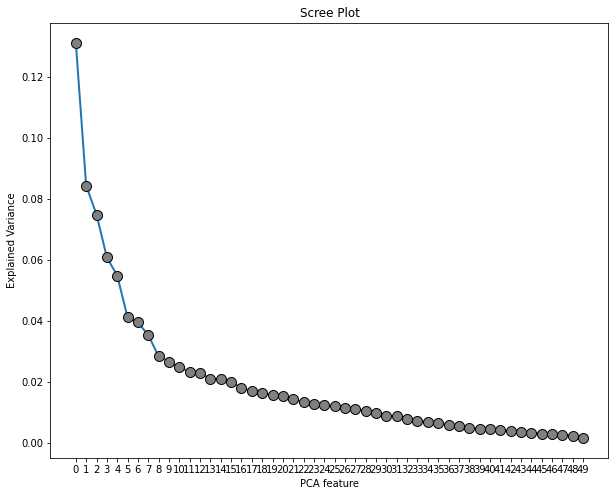

In [30]:
#calling the scree_plot function
scree_plot(pca_object = big5_pca)

Based on the scree plot above, we can see an elbow where the PCA features equals to 5. Therefore, we will proceed to run the code with a reduced number of 5 principal components. 

In [31]:
# INSTANTIATING a new model using the first five principal components
pca_5 = PCA(n_components = 5,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
big5_pca5 = pca_5.fit_transform(personality_scaled)

The following code is to show that the explained variance for each principal component does not change after dropping smaller PCs.

In [32]:
#Comparing the variance of the unlimited PCA model with the variance of the reduced PCA model
####################
### Max PC Model ###
####################
# transposing pca components (unlimited PCA)
factor_loadings = pd.DataFrame(pd.np.transpose(big5_pca.components_))

# naming rows as original features
factor_loadings = factor_loadings.set_index(personality_scaled.columns)


##################
### 5 PC Model ###
##################
# transposing pca components (5 components)
factor_loadings_5 = pd.DataFrame(pd.np.transpose(pca_5.components_))


# naming rows as original features
factor_loadings_5 = factor_loadings_5.set_index(personality_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


5 Components Factor Loadings
------------------------------
{factor_loadings_5.round(2)}
""")






MAX Components Factor Loadings
------------------------------
                                                         0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49
Am the life of the party                              -0.01  0.27 -0.15 -0.07  0.04  0.09 -0.19 -0.07 -0.09  0.11 -0.09 -0.27  0.14  0.04 -0.06 -0.30  0.23 -0.15  0.02 -0.03 -0.05 -0.17 -0.07 -0.12 -0.13 -0.09 -0.04 -0.17  0.03 -0.07  0.07 -0.07  0.19  0.23  0.22 -0.00  0.21  0.23  0.12 -0.03 -0.04 -0.14 -0.23 -0.10  0.18  0.17 -0.18  0.04 -0.06  0.01
Don't talk a lot                                       0.12 -0.13  0.16  0.06  0.27  0.09  0.12 -0.12  0.01  0.07 -0.14 -0.20 -0.07 -0.08 -0.06  0.12  0.12 -0.16 -0.09 -0.09 -0.33  0.23 -0.15 -0.08 -0.04  0.01 -0.10  0.19 -0.13  

<ipython-input-32-19012320e6d0>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(big5_pca.components_))
<ipython-input-32-19012320e6d0>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_5 = pd.DataFrame(pd.np.transpose(pca_5.components_))


In [33]:
#Showing questions and factors for each component
#Transposing pca components
factor_loadings_df_big5 = pd.DataFrame(pd.np.transpose(pca_5.components_))


#Naming rows as original features
factor_loadings_df_big5 = factor_loadings_df_big5.set_index(personality_scaled.columns)


#Checking the result
factor_loadings_df_big5.round(decimals=2)

<ipython-input-33-09b17250fcf8>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_df_big5 = pd.DataFrame(pd.np.transpose(pca_5.components_))


,0,1,2,3,4
Am the life of the party,-0.01,0.27,-0.15,-0.07,0.04
Don't talk a lot,0.12,-0.13,0.16,0.06,0.27
Feel comfortable around people,-0.21,0.10,-0.20,-0.21,0.07
Keep in the background,0.14,-0.09,0.20,-0.07,0.28
Start conversations,-0.16,0.26,-0.20,-0.07,-0.02
Have little to say,0.17,-0.06,0.07,-0.17,0.24
Talk to a lot of different people at parties,-0.05,0.27,-0.19,-0.05,0.13
Don't like to draw attention to myself,0.07,-0.13,0.11,0.09,0.22
Don't mind being the center of attention,-0.07,0.25,-0.17,-0.00,-0.09
Am quiet around strangers,0.14,-0.20,0.22,0.13,0.21


<strong>Interpreting Principal Components and Persona Development</strong><br>


Next, we named each Principal Component based on their factor loadings, that would best represent. We did this by identifying groups of customers that have very high or very low factor loadings in any given principal component.

In [34]:
# naming each principal component
factor_loadings_df_big5.columns = ['Grumpy Antisocial', #Easily distubed, Not comforable around people
                                   'Social-bipolar', #Life of the party, Change mood a lot       
                                   'Emotional-introvert', #Quiet around strangers, Feel other's emotions
                                   'Geek', #Quick understanding things, Full of ideas      
                                   'Quiet Artistic'] #Don't talk a lot, Relaxed,        


# checking the result
factor_loadings_df_big5.round(decimals=2)

,Grumpy Antisocial,Social-bipolar,Emotional-introvert,Geek,Quiet Artistic
Am the life of the party,-0.01,0.27,-0.15,-0.07,0.04
Don't talk a lot,0.12,-0.13,0.16,0.06,0.27
Feel comfortable around people,-0.21,0.10,-0.20,-0.21,0.07
Keep in the background,0.14,-0.09,0.20,-0.07,0.28
Start conversations,-0.16,0.26,-0.20,-0.07,-0.02
Have little to say,0.17,-0.06,0.07,-0.17,0.24
Talk to a lot of different people at parties,-0.05,0.27,-0.19,-0.05,0.13
Don't like to draw attention to myself,0.07,-0.13,0.11,0.09,0.22
Don't mind being the center of attention,-0.07,0.25,-0.17,-0.00,-0.09
Am quiet around strangers,0.14,-0.20,0.22,0.13,0.21


In [35]:
# Customer analysis
X_pca_reduced = pca_5.transform(personality_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# renaming columns

X_pca_df.columns= ['Grumpy Antisocial',  
                   'Social-bipolar',         
                   'Emotional-introvert', 
                   'Geek',            
                   'Quiet Artistic']   


# checking the results
#X_pca_df.round(decimals=2)


<strong>Clustering</strong><br>


Now, we will start building an agglomerative clustering model

In [36]:
#variance of each principal component
np.var(X_pca_df).round(decimals=2)

Grumpy Antisocial      6.56
Social-bipolar         4.22
Emotional-introvert    3.74
Geek                   3.04
Quiet Artistic         2.74
dtype: float64

Given that the variance is not longer equal, we will rescale it.

In [37]:
# rescale to have variance=1
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)



pca_scaled.columns= ['Grumpy Antisocial',  
                     'Social-bipolar',         
                     'Emotional-introvert', 
                     'Geek',            
                     'Quiet Artistic']   

# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df).round(decimals=2), '\n\n')
print(pd.np.var(pca_scaled).round(decimals=2))

Grumpy Antisocial      6.56
Social-bipolar         4.22
Emotional-introvert    3.74
Geek                   3.04
Quiet Artistic         2.74
dtype: float64 


Grumpy Antisocial      1.0
Social-bipolar         1.0
Emotional-introvert    1.0
Geek                   1.0
Quiet Artistic         1.0
dtype: float64


<ipython-input-37-7f82f32824b2>:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(X_pca_df).round(decimals=2), '\n\n')
<ipython-input-37-7f82f32824b2>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(pca_scaled).round(decimals=2))


<strong>Dendrogram</strong><br>

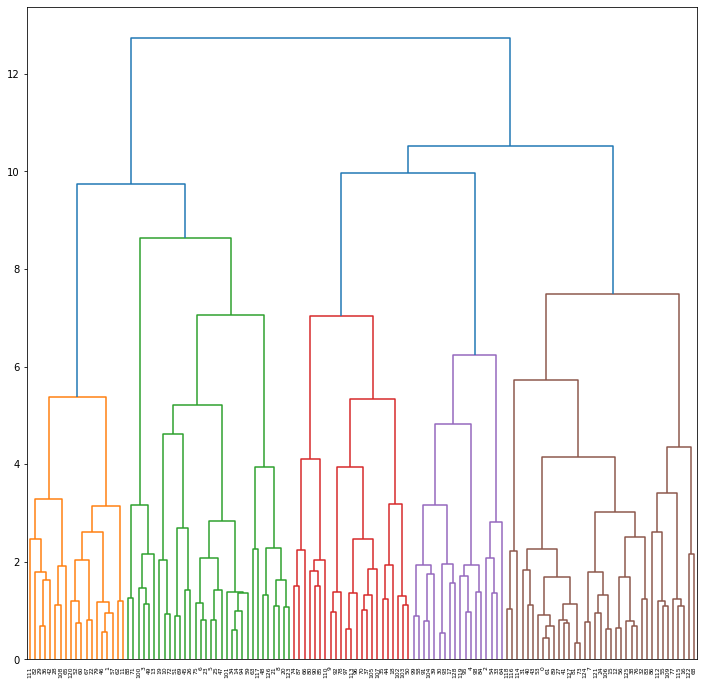

In [38]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./standard_hierarchical_clust_ward_big5.png')
plt.show()

<strong>Iteria Plot</strong><br>

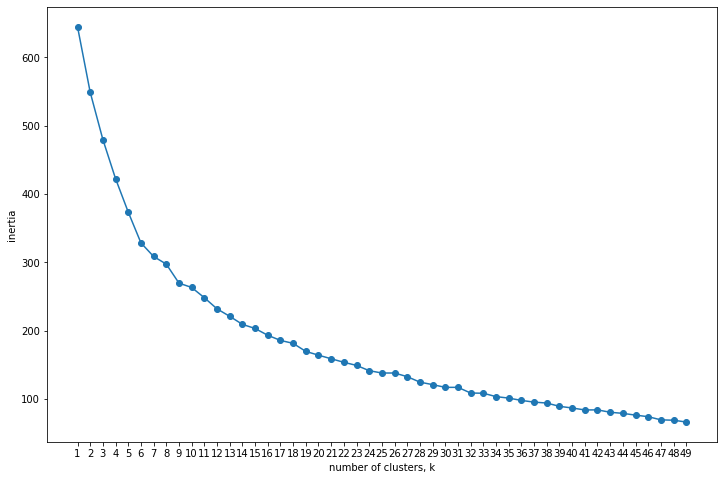

In [39]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled)

Based on the dendogram and intertia plot, where we tested our candidate number of clusters. We decided that the number of clusters that best suits is 4.

In [40]:
# INSTANTIATING a k-Means object with fourclusters
customers_k_pca = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

2    49
3    31
1    25
0    24
Name: Cluster, dtype: int64


In [41]:
# storing cluster centers means
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Grumpy Antisocial',  
                            'Social-bipolar',         
                            'Emotional-introvert', 
                            'Geek',            
                            'Quiet Artistic'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(decimals=2)


,Grumpy Antisocial,Social-bipolar,Emotional-introvert,Geek,Quiet Artistic
0,0.79,0.76,0.48,-0.19,0.88
1,0.26,-0.95,0.59,0.99,0.31
2,-0.10,-0.28,-0.05,-0.84,-0.40
3,-0.67,0.62,-0.77,0.68,-0.30


Based on the previous output, we decide to optionally name our clusters and develop back stories for ideal members of each group.

In [42]:
# concatenating cluster with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey.loc[ : , ['What laptop do you currently have?',
                                            'What laptop would you buy in next assuming if all laptops cost the same?',
                                            'What is your nationality? ',
                                            'What program are you in?',
                                            'What is your ethnicity?',
                                            'Gender',
                                            'What is your age?',
                                            'surveyID']],
                                clst_pca_df],
                               axis = 1)

# renaming Clusters
cluster_names = {0 : 'Shy Artists', #Shy Artists
                 1 : 'Anti-Social Geek', # Anti-Social Geek
                 2 : 'Life of the Party', #Life of the Party
                 3 : 'Social Networker'} #Social Networker

final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)

# renaming columns
final_pca_clust_df.columns = ['What laptop do you currently have?',
                             'What laptop would you buy in next assuming if all laptops cost the same?',
                             'What is your nationality? ',
                             'What program are you in?',
                             'What is your ethnicity?',
                                'Gender',
                                'What is your age?',
                                'surveyID',
                                'Cluster',
                                'Grumpy Antisocial',  
                            'Social-bipolar',         
                            'Emotional-introvert', 
                            'Geek',            
                            'Quiet Artistic']


# checking the results
final_pca_clust_df.head(n = 5)

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What is your nationality?,What program are you in?,What is your ethnicity?,Gender,What is your age?,surveyID,Cluster,Grumpy Antisocial,Social-bipolar,Emotional-introvert,Geek,Quiet Artistic
0,Macbook,Macbook,Ecuadorian,DD (MIB & Business Analytics),Hispanic / Latino,Female,25.0,10000.0,Life of the Party,0.248952,-0.505081,0.505391,-0.011025,-1.078718
1,Windows laptop,Windows laptop,Ecuadorian,One year Business Analytics,Hispanic / Latino,Male,27.0,10001.0,Anti-Social Geek,0.845267,-0.591986,1.361889,2.053845,1.107067
2,Windows laptop,Windows laptop,Indian,One year Business Analytics,West Asian / Indian,Male,25.0,10002.0,Social Networker,1.286857,-2.454765,-4.448054,2.133418,-1.299191
3,Windows laptop,Windows laptop,Indian,One year Business Analytics,West Asian / Indian,Female,26.0,10003.0,Shy Artists,0.826527,2.600973,1.340038,-0.857590,2.788673
4,Macbook,Windows laptop,Chinese,DD (MBA & Disruptive innovation),Far east Asian,Male,27.0,10004.0,Shy Artists,4.040381,1.547018,-0.697926,-0.259725,0.413318


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Hult DNA</strong><br>


Now, we developed a PCA model for the Hult DNA with no limit to principal components. Next, we will decide how many components to retain to build a new model with a limited number of principal components and interpret the results.

In [43]:
#Instantiating PCA object with no number of principal components for hult dna
hultdna_pca = PCA(n_components = None,
         random_state = 802)

#Fitting and transforming
hult_pca = hultdna_pca.fit_transform(hult)

# comparing dimensions of each DataFrame
print("Original shape:", hult.shape)
print("PCA shape     :",  hult_pca.shape)


Original shape: (129, 18)
PCA shape     : (129, 18)


<strong> Scree Plot <strong>

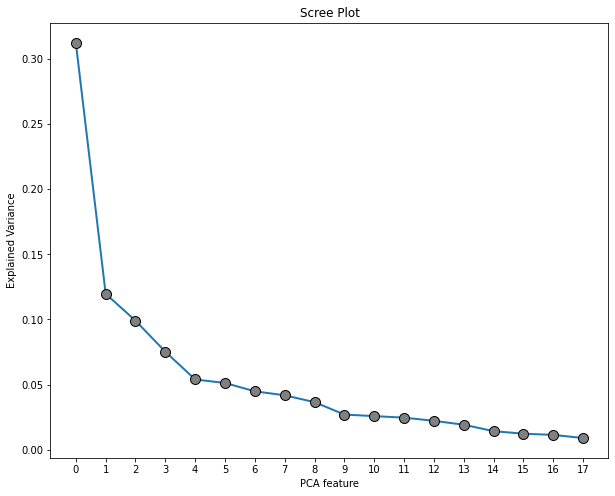

In [44]:
#Calling scree plot function
scree_plot(pca_object = hultdna_pca)

Based on the scree plot above, we can see an elbow where the PCA features equals to 3. Therefore, we will proceed to run the code with a reduced number of 3 principal components.



In [45]:
# INSTANTIATING a new model using the first fourprincipal components
pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
hult_pca3 = pca_3.fit_transform(hult_scaled)

The following code is to show that the explained variance for each principal component does not change after dropping smaller PCs.



In [46]:
####################
#comparing the variance of the unlimited PCA model with the variance of the reduced PCA model

### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings_hult = pd.DataFrame(pd.np.transpose(hultdna_pca.components_))


# naming rows as original features
factor_loadings_hult = factor_loadings_hult.set_index(hult_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3_hult = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3_hult = factor_loadings_3_hult.set_index(hult_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings_hult.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3_hult.round(2)}
""")



MAX Components Factor Loadings
------------------------------
                                                                              0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17
See underlying patterns in complex situations                              -0.26 -0.05 -0.08 -0.01  0.09 -0.07  0.12 -0.45 -0.42  0.41 -0.05  0.46  0.11  0.05  0.26 -0.21 -0.09  0.03
Don't  generate ideas that are new and different                            0.14  0.42  0.78 -0.19  0.04 -0.10 -0.31 -0.02 -0.01  0.15 -0.04  0.10  0.05 -0.08  0.03 -0.02 -0.11  0.02
Demonstrate an awareness of personal strengths and limitations             -0.22  0.15  0.09 -0.04  0.07 -0.35  0.27  0.16 -0.39  0.06  0.43 -0.42  0.25  0.10 -0.09 -0.05  0.20 -0.22
Display a growth mindset                                                   -0.26  0.06 -0.07 -0.14 -0.04 -0.24  0.14  0.26 -0.09 -0.04 -0.54  0.15  0.31 -0.39 -0.39  0.14 -0.03  0.12
Respond effectively to

<ipython-input-46-49691a42c12d>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_hult = pd.DataFrame(pd.np.transpose(hultdna_pca.components_))
<ipython-input-46-49691a42c12d>:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_3_hult = pd.DataFrame(pd.np.transpose(pca_3.components_))


<strong>Interpreting Principal Components and Persona Development</strong><br>

In [47]:
#showing questions and factors for each component
# transposing pca components
factor_loadings_df_hult = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_df_hult = factor_loadings_df_hult.set_index(hult_scaled.columns)


# checking the result
factor_loadings_df_hult.round(decimals=2)

<ipython-input-47-63e758417bad>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_df_hult = pd.DataFrame(pd.np.transpose(pca_3.components_))


,0,1,2
See underlying patterns in complex situations,-0.25,0.18,-0.06
Don't generate ideas that are new and different,0.08,-0.36,0.55
Demonstrate an awareness of personal strengths and limitations,-0.23,-0.16,0.21
Display a growth mindset,-0.27,-0.03,0.00
Respond effectively to multiple priorities,-0.28,-0.04,0.20
"Take initiative even when circumstances, objectives, or rules aren't clear",-0.27,0.02,0.25
Encourage direct and open discussions,-0.28,-0.01,0.28
Listen carefully to others,-0.18,-0.32,-0.31
Don't persuasively sell a vision or idea,0.09,-0.55,-0.21
Build cooperative relationships,-0.27,-0.09,-0.03


Next, we named each Principal Component based on their factor loadings, that would best represent. We did this by identifying groups of customers that have very high or very low factor loadings in any given principal component.

In [48]:
# naming each principal component
factor_loadings_df_hult.columns = ['Careless/Bad professional', 
                              'Innovative',     
                              'Self-aware']       


# checking the result
factor_loadings_df_hult.round(decimals=2)

,Careless/Bad professional,Innovative,Self-aware
See underlying patterns in complex situations,-0.25,0.18,-0.06
Don't generate ideas that are new and different,0.08,-0.36,0.55
Demonstrate an awareness of personal strengths and limitations,-0.23,-0.16,0.21
Display a growth mindset,-0.27,-0.03,0.00
Respond effectively to multiple priorities,-0.28,-0.04,0.20
"Take initiative even when circumstances, objectives, or rules aren't clear",-0.27,0.02,0.25
Encourage direct and open discussions,-0.28,-0.01,0.28
Listen carefully to others,-0.18,-0.32,-0.31
Don't persuasively sell a vision or idea,0.09,-0.55,-0.21
Build cooperative relationships,-0.27,-0.09,-0.03


In [49]:
# Customer analysis
X_pca_reduced_hult= pca_3.transform(hult_scaled)


# converting to a DataFrame
X_pca_df_hult = pd.DataFrame(X_pca_reduced_hult)


# renaming columns
X_pca_df_hult.columns= ['Careless/Bad professional', 
                        'Innovative',     
                        'Self-aware']        
  


# checking the results
#X_pca_df_hult.round(decimals=2)



<strong>Clustering</strong><br>

Now, we will start building an agglomerative clustering model for the Hult DNA.

In [50]:
# calculate variance
np.var(X_pca_df_hult).round(decimals=2)

Careless/Bad professional    6.43
Innovative                   1.53
Self-aware                   1.25
dtype: float64

Given that the variance is not longer equal, we will rescale it.

In [51]:
# rescale variance, we want variance=1
#INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df_hult)


# TRANSFORMING our data after fit
X_scaled_pca_hult = scaler.transform(X_pca_df_hult)


# converting scaled data into a DataFrame
pca_scaled_hult = pd.DataFrame(X_scaled_pca_hult)



pca_scaled_hult.columns= ['Careless/Bad professional', 
                              'Innovative',     
                              'Self-aware'] 

# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df_hult).round(decimals=2), '\n\n')
print(pd.np.var(pca_scaled_hult).round(decimals=2))

Careless/Bad professional    6.43
Innovative                   1.53
Self-aware                   1.25
dtype: float64 


Careless/Bad professional    1.0
Innovative                   1.0
Self-aware                   1.0
dtype: float64


<ipython-input-51-694e371e7ff7>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(X_pca_df_hult).round(decimals=2), '\n\n')
<ipython-input-51-694e371e7ff7>:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(pca_scaled_hult).round(decimals=2))


<strong>Dendrogram<strong>

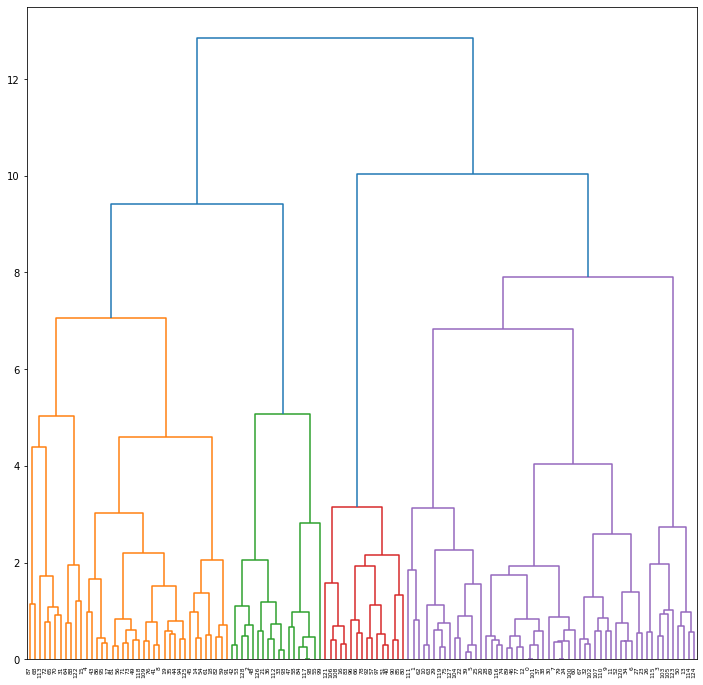

In [52]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled_hult,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./standard_hierarchical_clust_ward_hultdna.png')
plt.show()

<strong>Inertia Plot<strong>

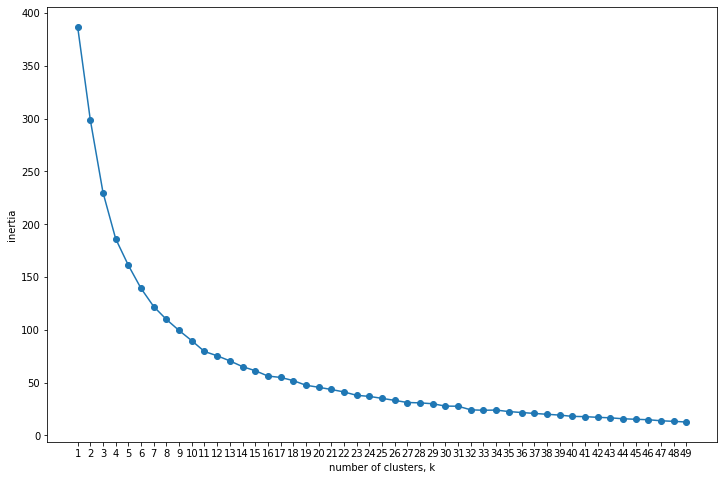

In [53]:
interia_plot(data = pca_scaled_hult)

Based on the dendogram and intertia plot, where we tested our candidate number of clusters. We decided that the number of clusters that best suits is 3.

In [54]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca_hult = KMeans(n_clusters   = 3,
                         random_state = 219)


# fitting the object to the data
customers_k_pca_hult.fit(pca_scaled_hult)


# converting the clusters to a DataFrame
customers_kmeans_pca_hult = pd.DataFrame({'Cluster': customers_k_pca_hult.labels_})


# checking the results
print(customers_kmeans_pca_hult.iloc[: , 0].value_counts())

2    47
1    41
0    41
Name: Cluster, dtype: int64


In [55]:
# calculating centers of each cluster
centroids_pca_hult = customers_k_pca_hult.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_hult_df = pd.DataFrame(centroids_pca_hult)


# renaming principal components
centroids_pca_hult_df.columns = ['Careless/Bad professional', 
                              'Innovative',     
                              'Self-aware'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_hult_df.round(decimals=2)

,Careless/Bad professional,Innovative,Self-aware
0,-0.04,-0.50,-1.00
1,0.62,-0.52,0.84
2,-0.50,0.88,0.14


Based on the previous output, we decide to optionally name our clusters and develop back stories for ideal members of each group.

In [56]:

# concatenating cluster with principal components
clst_pca_df_hult = pd.concat([customers_kmeans_pca_hult,
                         X_pca_df_hult],
                         axis = 1)

# checking results
clst_pca_df_hult

# renaming Cluster
cluster_names = {0 : 'Drop Out', #Drop Out
                 1 : 'Average Student', #Average Student
                 2 : 'Star Student'} #Star Student


clst_pca_df_hult['Cluster'].replace(cluster_names, inplace = True)


# concatenating demographic information with pca-clusters
final_pca_clust_df_hult = pd.concat([survey.loc[ : , ['What laptop do you currently have?',
                                            'What laptop would you buy in next assuming if all laptops cost the same?',
                                            'What is your nationality? ',
                                            'What program are you in?',
                                            'What is your ethnicity?',
                                            'Gender',
                                            'What is your age?',
                                            'surveyID']],
                                clst_pca_df_hult ],
                               axis = 1)

# renaming columns
final_pca_clust_df_hult.columns = ['What laptop do you currently have?',
                             'What laptop would you buy in next assuming if all laptops cost the same?',
                             'What is your nationality? ',
                             'What program are you in?',
                             'What is your ethnicity?',
                                'Gender',
                                'What is your age?',
                                'surveyID',
                                'Cluster',
                                'Careless/Bad professional', 
                              'Innovative',     
                              'Self-aware']


# checking the results
final_pca_clust_df_hult.head(n = 5)

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What is your nationality?,What program are you in?,What is your ethnicity?,Gender,What is your age?,surveyID,Cluster,Careless/Bad professional,Innovative,Self-aware
0,Macbook,Macbook,Ecuadorian,DD (MIB & Business Analytics),Hispanic / Latino,Female,25.0,10000.0,Star Student,0.084816,0.178131,-0.043549
1,Windows laptop,Windows laptop,Ecuadorian,One year Business Analytics,Hispanic / Latino,Male,27.0,10001.0,Drop Out,-0.090132,0.144905,-2.047709
2,Windows laptop,Windows laptop,Indian,One year Business Analytics,West Asian / Indian,Male,25.0,10002.0,Star Student,2.729241,1.794919,0.471327
3,Windows laptop,Windows laptop,Indian,One year Business Analytics,West Asian / Indian,Female,26.0,10003.0,Drop Out,-1.697471,-2.717918,-1.198568
4,Macbook,Windows laptop,Chinese,DD (MBA & Disruptive innovation),Far east Asian,Male,27.0,10004.0,Average Student,3.887516,-1.647937,0.987335


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part V: Analyze with Demographics</h2><br>

Finally, in order to get some insights we plot results with demographics. We did the following plots:

1. What laptop would you buy in next assuming if all laptops cost the same? - Big 5 Personality Tests
2. Gender - Big 5 Personality Tests
3. What is your ethnicity? - Big 5 Personality Test
4. What laptop would you buy in next assuming if all laptops cost the same? - Hult DNA
4. Gender - Hult DNA
6. What is your ethnicity? - Hult DNA

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>1. What laptop would you buy in next assuming if all laptops cost the same? - Big 5 Personality Test</strong><br>


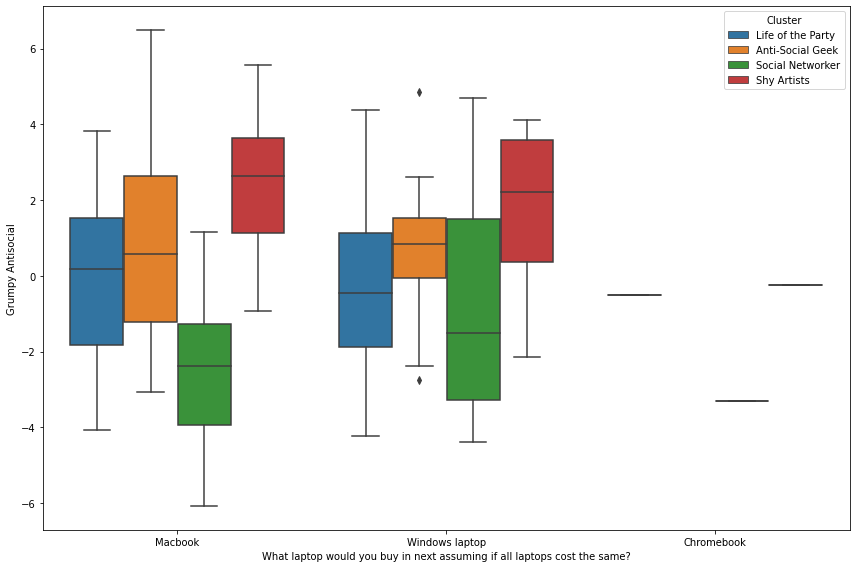

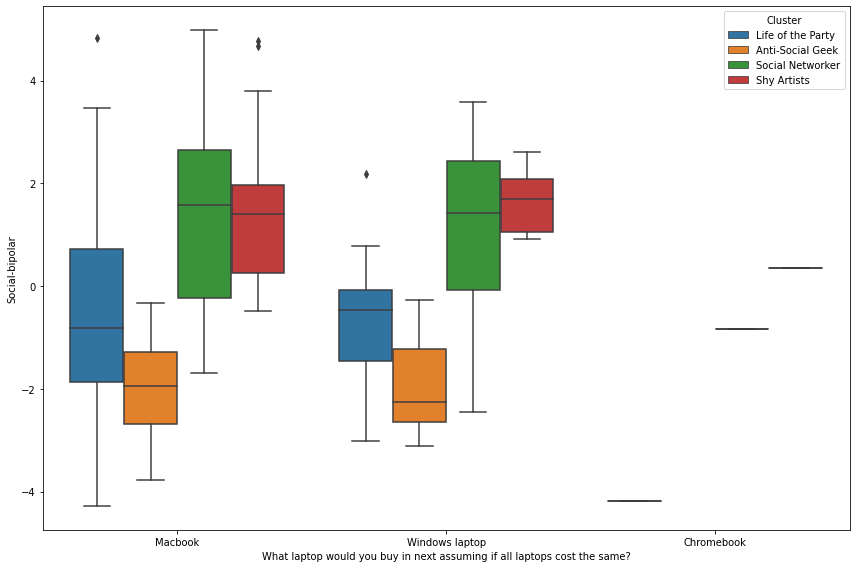

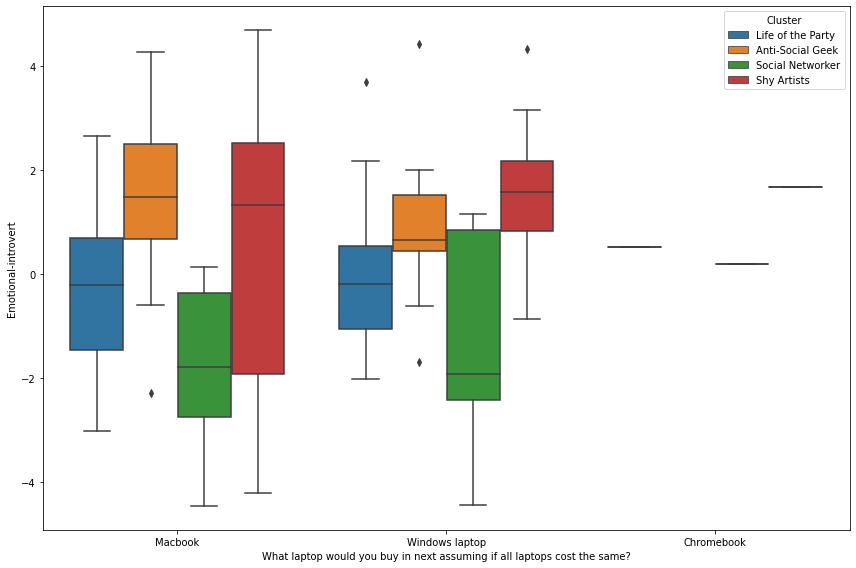

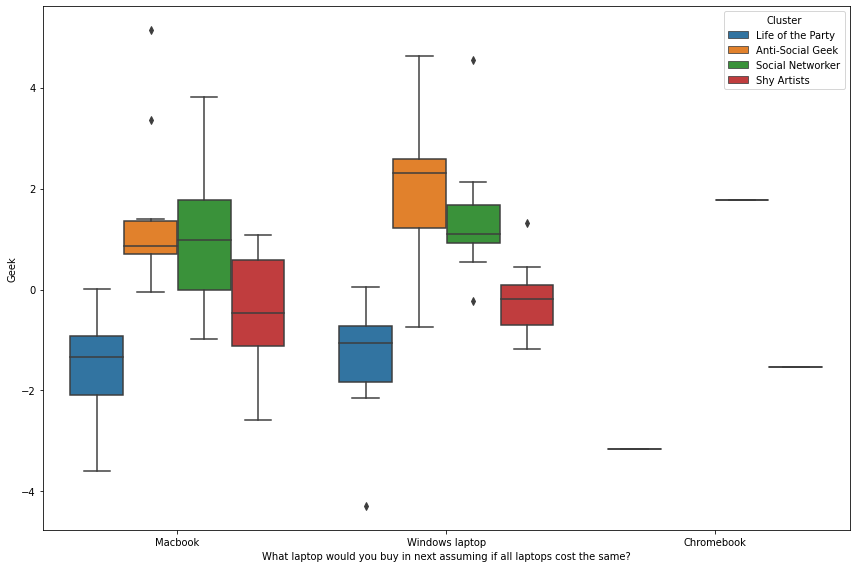

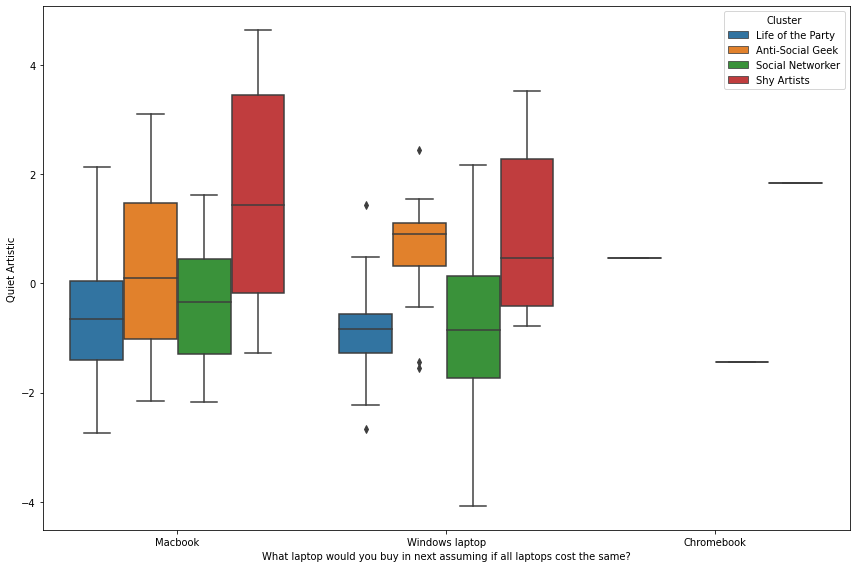

In [57]:
###################################################
#Which laptop would you buy? - 'Grumpy Antisocial'
###################################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Grumpy Antisocial',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

################################################
#Which laptop would you buy? - 'Social Bipolar'
################################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Social-bipolar',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

####################################################
#Which laptop would you buy? - 'Emotional-introvert'
####################################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Emotional-introvert',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

#####################################
#Which laptop would you buy? - 'Geek'
######################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Geek',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

###############################################
#Which laptop would you buy? - 'Quiet Artistic'
###############################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Quiet Artistic',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>2. Gender - Big 5 Personality Test</strong><br>


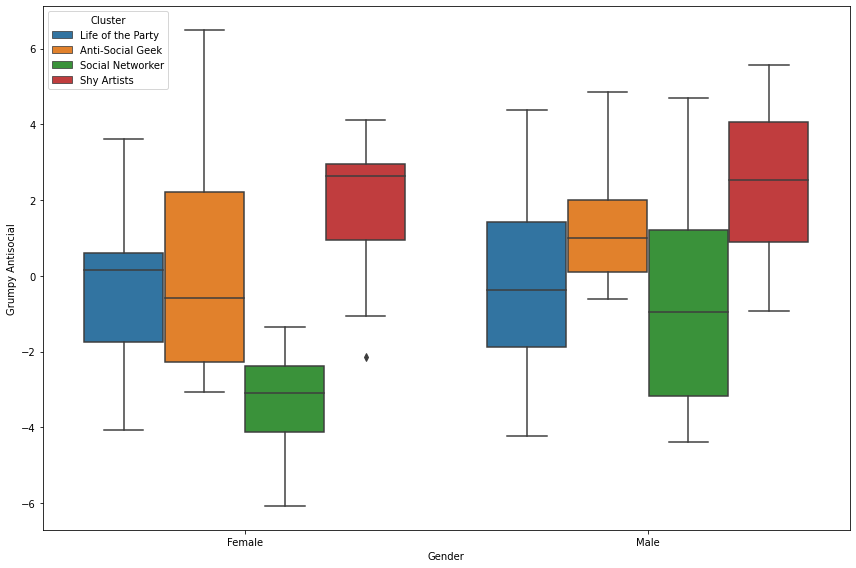

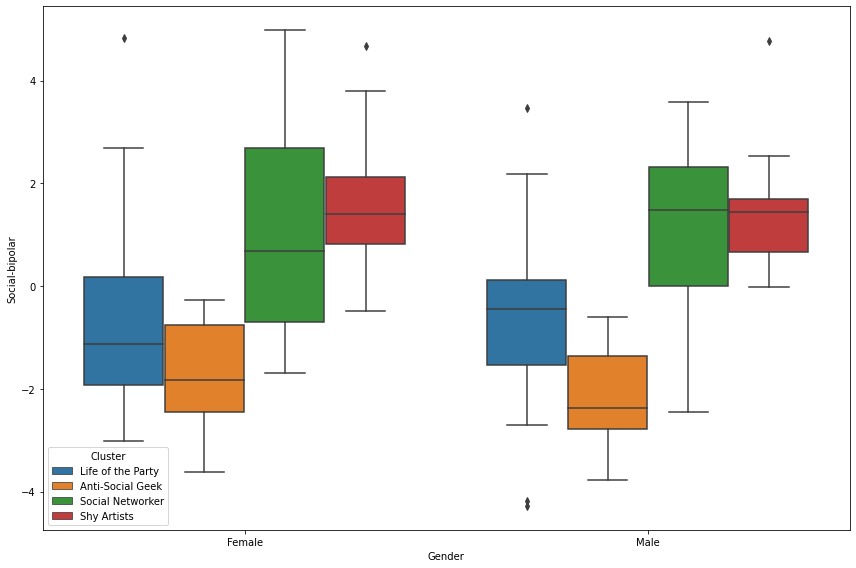

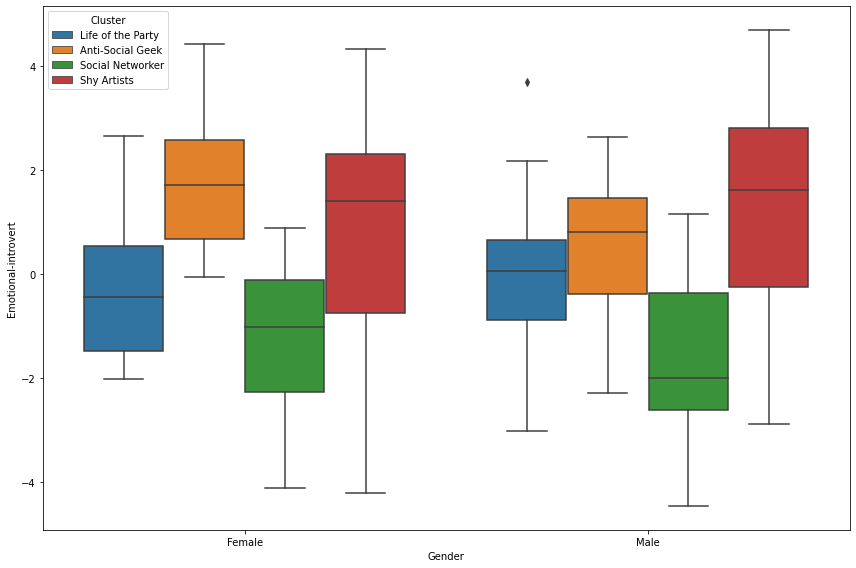

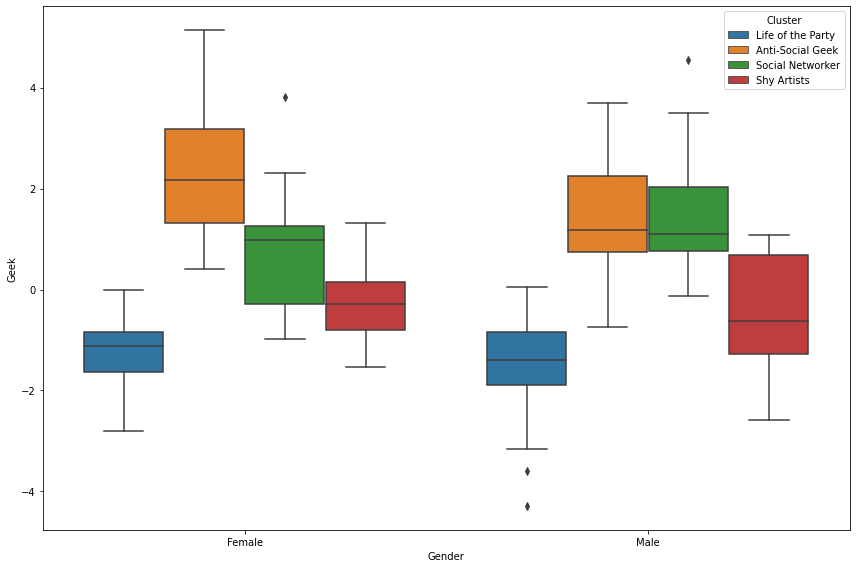

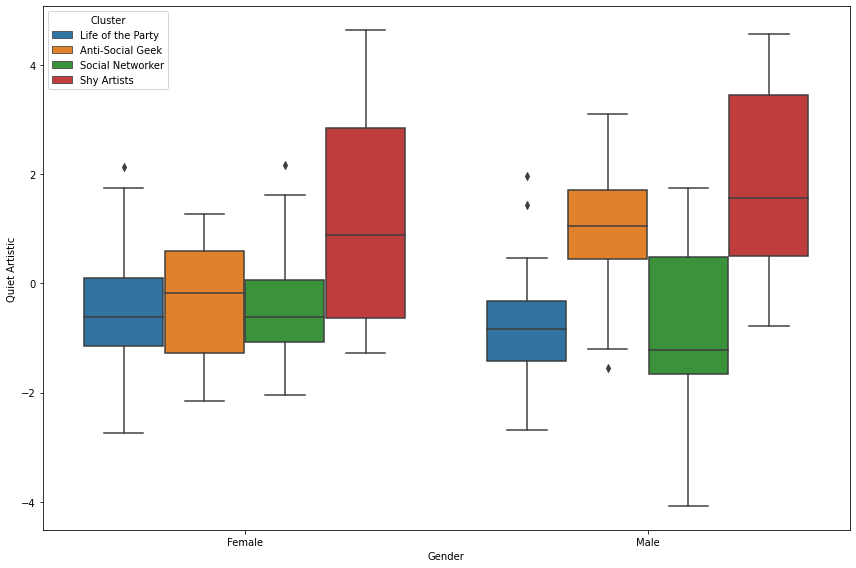

In [58]:
###################################################
#Gender - 'Grumpy Antisocial'
###################################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Grumpy Antisocial',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

################################################
#Gender - 'Social Bipolar'
################################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Social-bipolar',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

####################################################
#Gender - 'Emotional-introvert'
####################################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Emotional-introvert',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

#####################################
#Gender - 'Geek'
######################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Geek',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

###############################################
#Gender - 'Quiet Artistic'
###############################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Quiet Artistic',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>3. What is your ethnicity? - Big 5 Personality Test</strong><br>


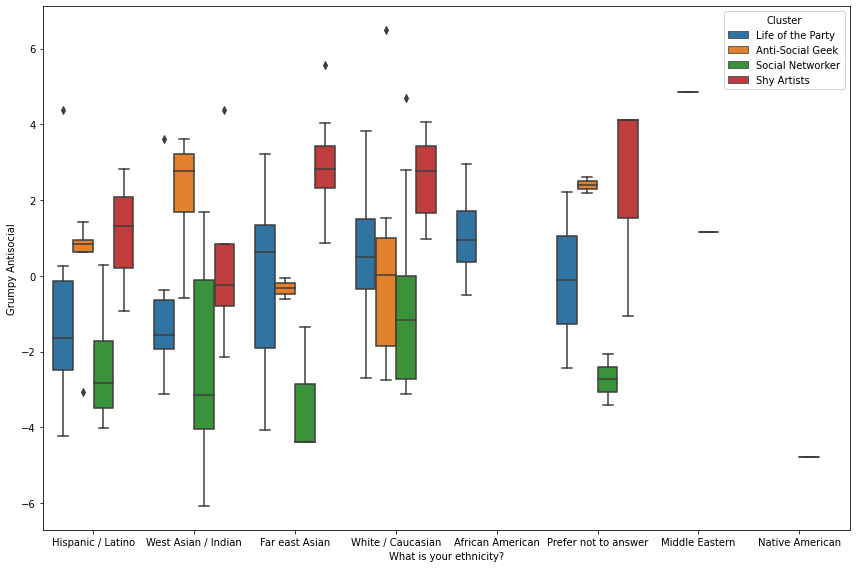

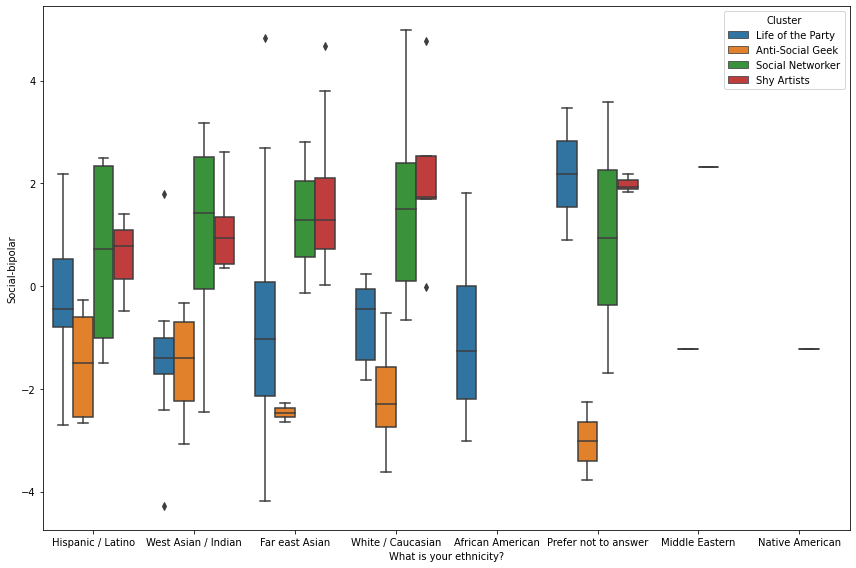

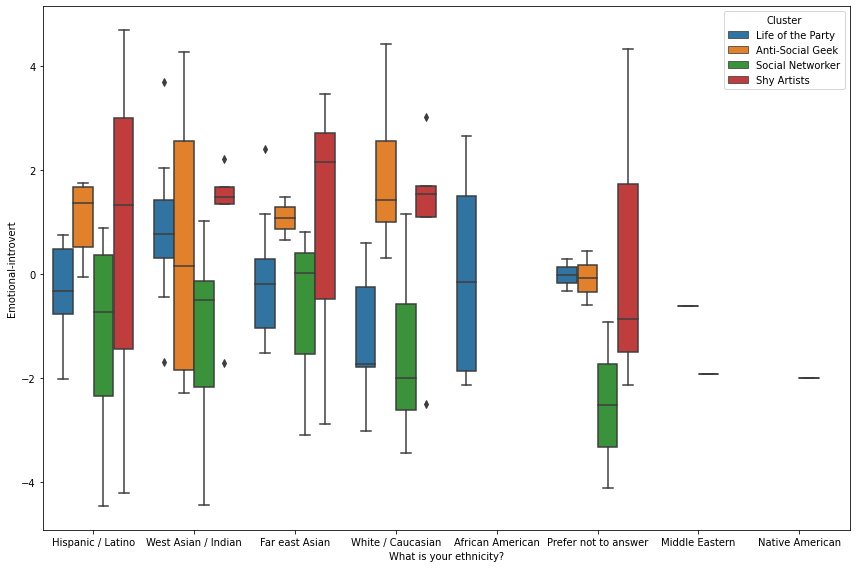

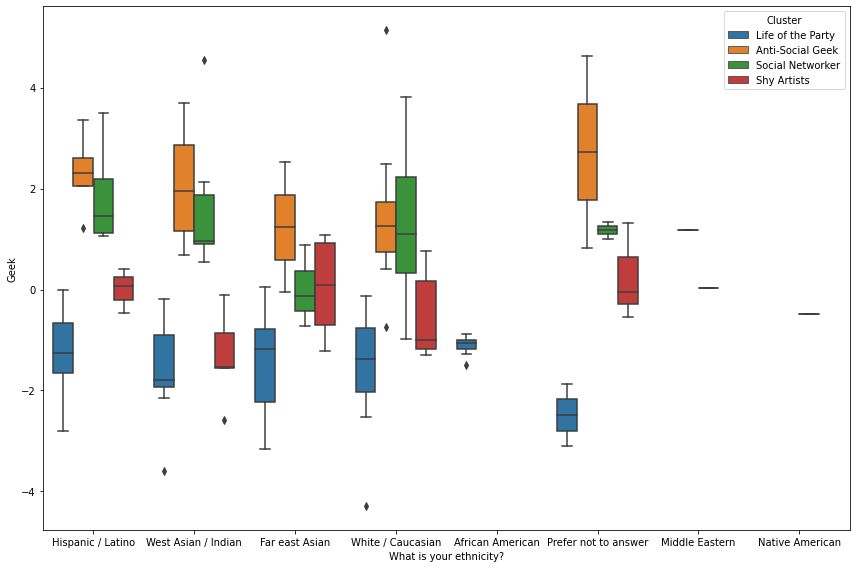

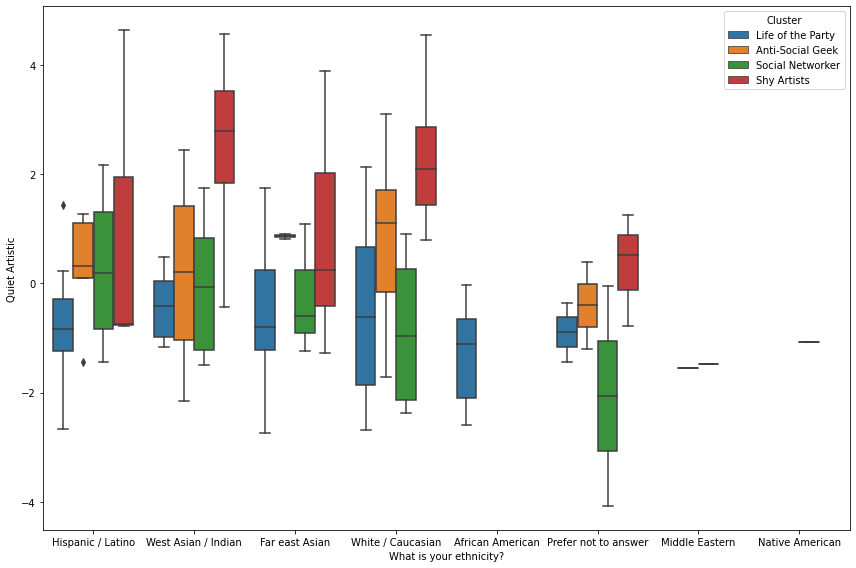

In [59]:
###################################################
#What is your ethnicity? - 'Grumpy Antisocial'
###################################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your ethnicity?',
            y = 'Grumpy Antisocial',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

################################################
#What is your ethnicity? - 'Social Bipolar'
################################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your ethnicity?',
            y = 'Social-bipolar',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

####################################################
#What is your ethnicity? - 'Emotional-introvert'
####################################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your ethnicity?',
            y = 'Emotional-introvert',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

#####################################
#What is your ethnicity? - 'Geek'
######################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your ethnicity?',
            y = 'Geek',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

###############################################
#What is your ethnicity? - 'Quiet Artistic'
###############################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your ethnicity?',
            y = 'Quiet Artistic',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>3. What laptop would you buy in next assuming if all laptops cost the same? - Hult DNA</strong><br>


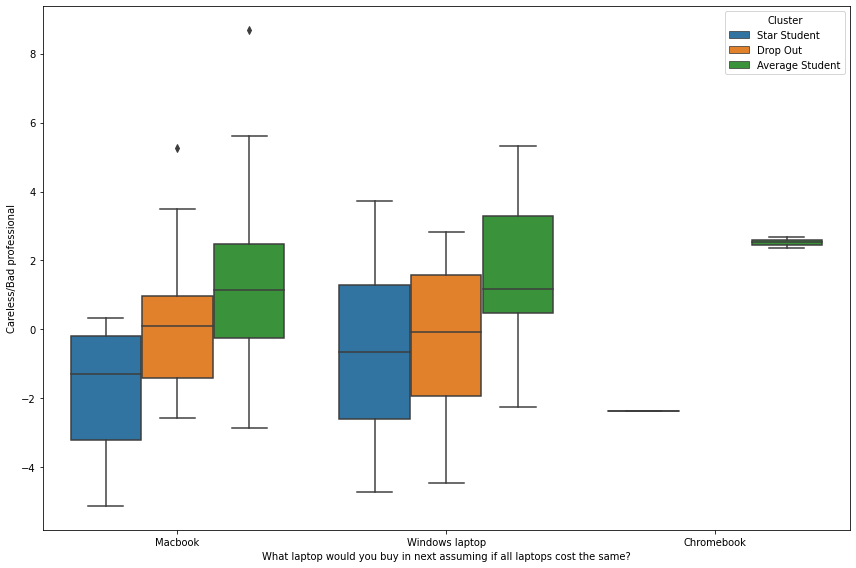

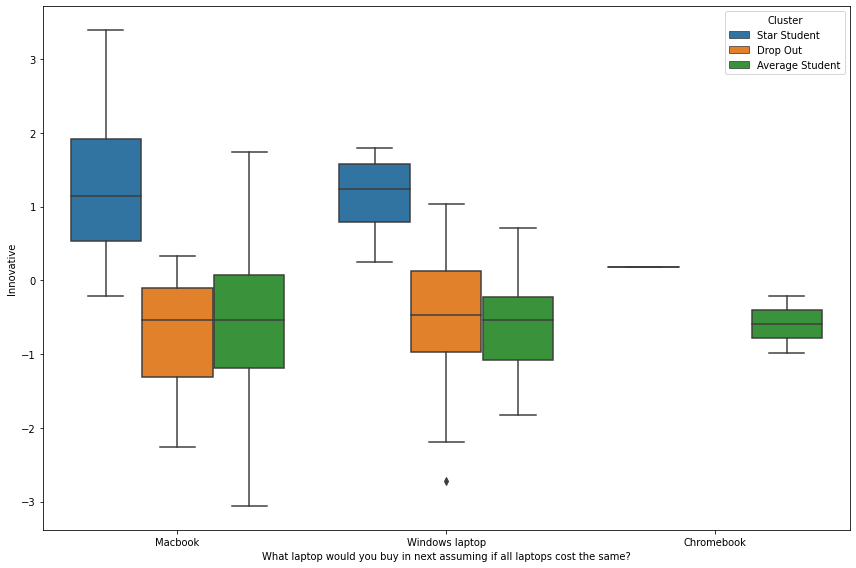

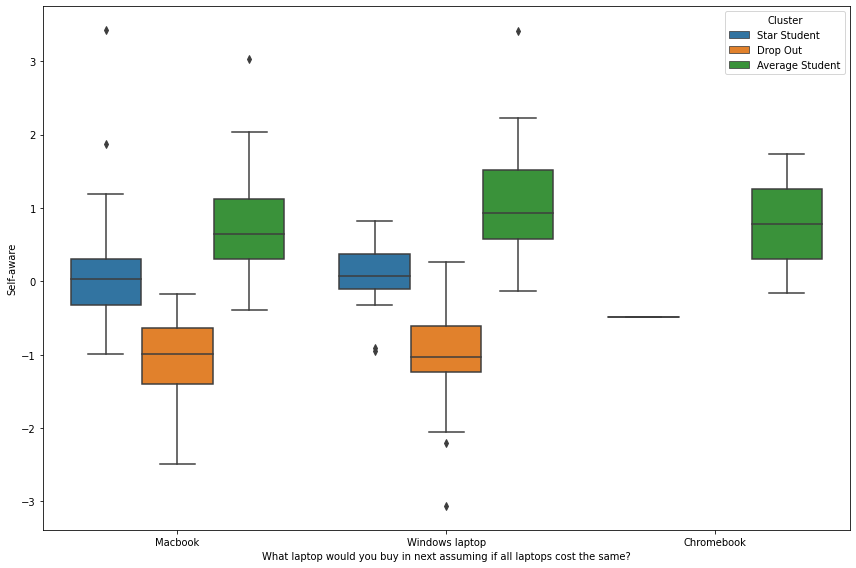

In [60]:
#################################################################
#Which laptop would you buy? - Hult DNA Careless/Bad professional
#################################################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Careless/Bad professional',
            hue = 'Cluster',
            data = final_pca_clust_df_hult)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

##################################################
#Which laptop would you buy? - Hult DNA Innovative
##################################################


fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Innovative',
            hue = 'Cluster',
            data = final_pca_clust_df_hult)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

##################################################
#Which laptop would you buy? - Hult DNA Self-aware
##################################################


                              
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Self-aware',
            hue = 'Cluster',
            data = final_pca_clust_df_hult)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Gender - Hult DNA</strong><br>

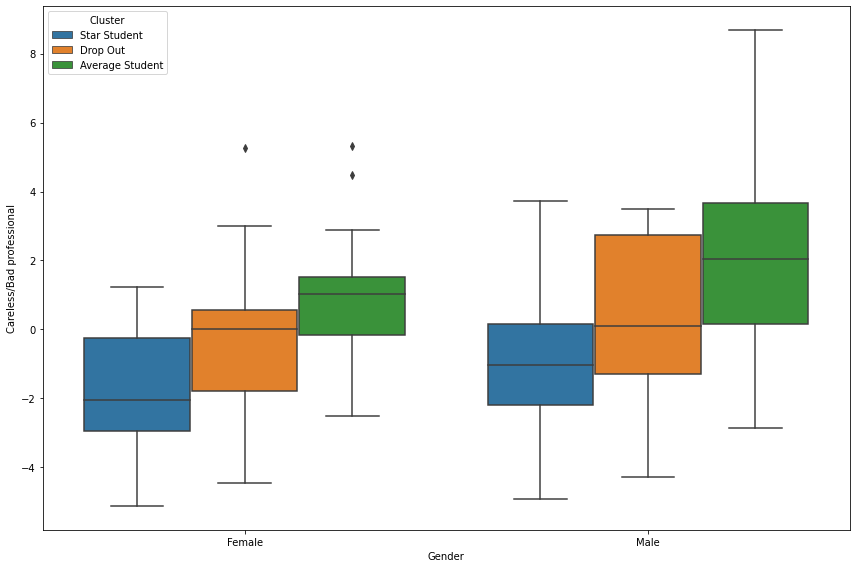

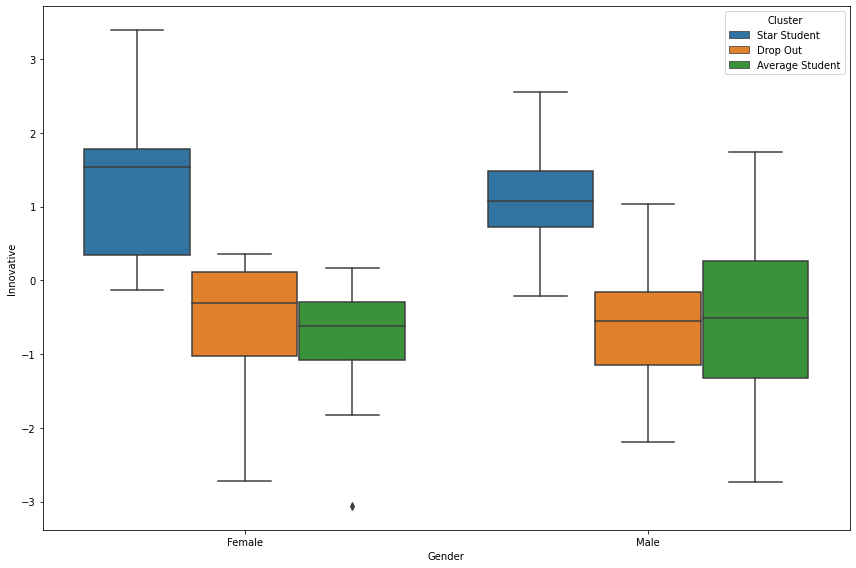

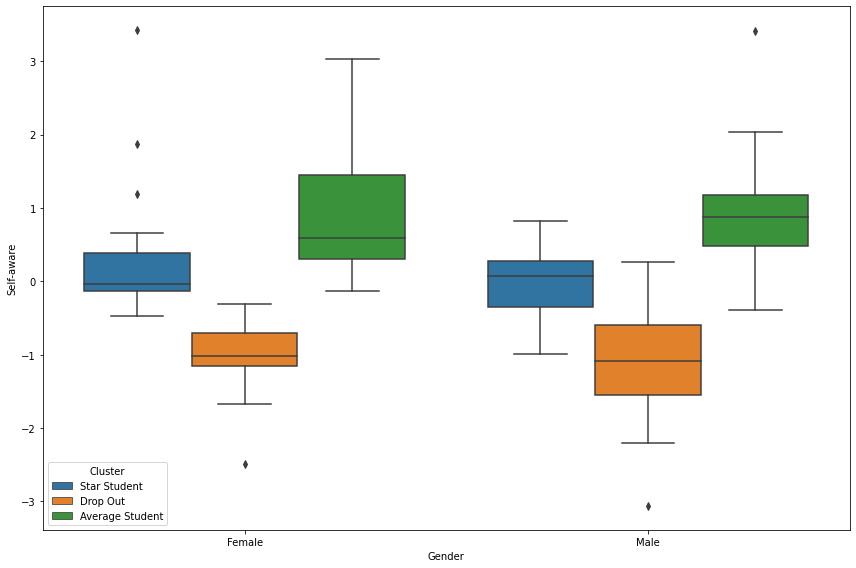

In [61]:
#################################################################
#Gender - Hult DNA Careless/Bad professional
#################################################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Careless/Bad professional',
            hue = 'Cluster',
            data = final_pca_clust_df_hult)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

##################################################
#Gender - Hult DNA Innovative
##################################################


fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Innovative',
            hue = 'Cluster',
            data = final_pca_clust_df_hult)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

##################################################
#Gender - Hult DNA Self-aware
##################################################


                              
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Self-aware',
            hue = 'Cluster',
            data = final_pca_clust_df_hult)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>6. What is your ethnicity? - Hult DNA</strong><br>

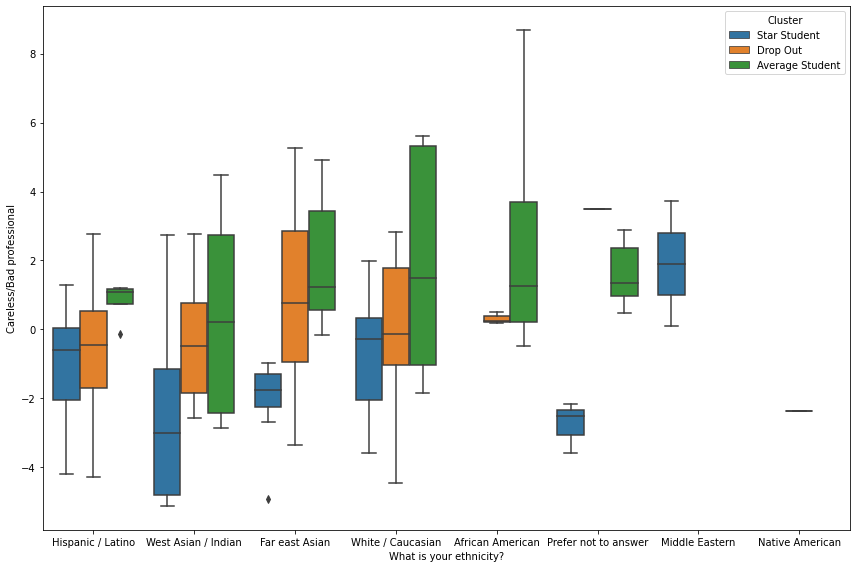

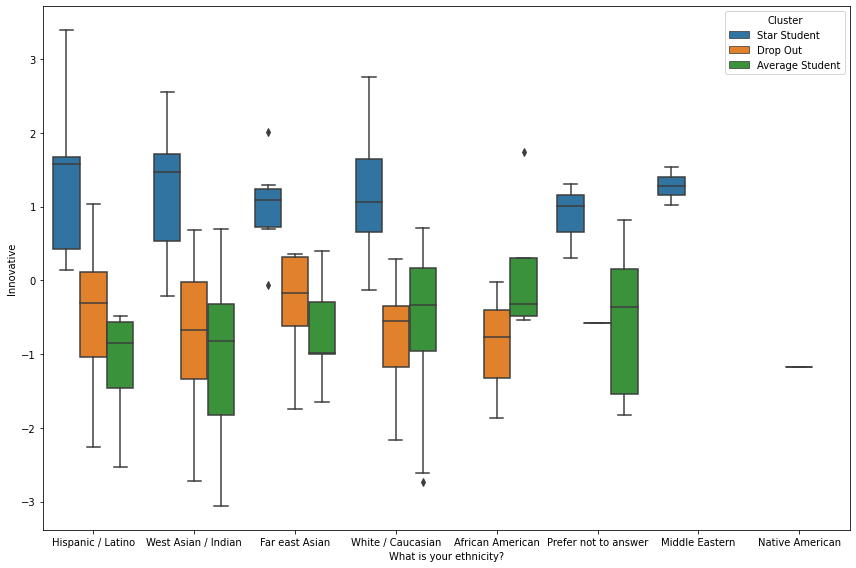

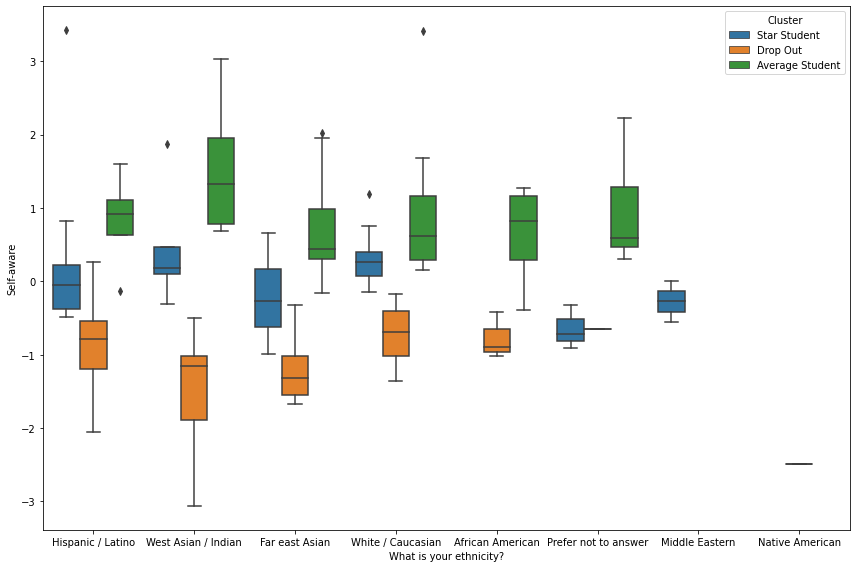

In [62]:
#################################################################
#What is your ethnicity? - Hult DNA Careless/Bad professional
#################################################################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your ethnicity?',
            y = 'Careless/Bad professional',
            hue = 'Cluster',
            data = final_pca_clust_df_hult)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

##################################################
#What is your ethnicity? - Hult DNA Innovative
##################################################


fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your ethnicity?',
            y = 'Innovative',
            hue = 'Cluster',
            data = final_pca_clust_df_hult)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

##################################################
#What is your ethnicity? - Hult DNA Self-aware
##################################################


                              
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What is your ethnicity?',
            y = 'Self-aware',
            hue = 'Cluster',
            data = final_pca_clust_df_hult)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Insights</h2><br>

<strong>Big 5 Personality Test</strong><br>

In our first data exploration, we found that the majority of the responders in the survey wanted to buy a Macbook next which is a great insight to start for Apple. From the plots of the Big 5 Personality Test, we came as a group to the conclusion that students who tend to be creative or artistic and tend to have a quiet and shy personality are more prone to buy a Macbook. Additionally, it seems that females are more likely to buy a Macbook than males. Although there is no much difference betweeen both genders. When exploring the ethnicities which students respond in the survey, the plots showed that White/caucasian and Asians are the group ethnicities that are more likely to buy a Macbook. 

<strong>Hult DNA</strong><br>

Based on our analysis from the Hult DNA, we found that the type of personality that is more likely to buy a Macbook from the Hult Students are students who are Innovative and tend to be the type of "Star Students". Once again, similarly to the Big 5 Personality test analsysis, it seems that females are more likely to buy a Macbook than males. When exploring the ethnicities which students respond in the survey, the plots showed that White/caucasian and Hispanic/Latinos are the group ethnicities that are more likely to buy a Macbook. 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Recommendations</h2><br>

Based on the findings and insights of the Big 5 Personality Test, Apple should target students who are more creative and innovative. According to Rocket yard, “next generation job seekers see Mac as more intuitive, more modern and more easily integrated with their other devices. This leaves them free to be more productive, creative and collaborative” (Mark, 2019). In order to better target this type of students, Apple could collaborate with Adobe, so that its programs can come free for Apple customers. Adobe programs such as Photoshop, Ilustrator and Acrobat are often used by creative and innovative people.

Given our findings of the Hult DNA, we recommend Apple to create a discount package for students that comes with a mouse, AirPods. This would be a perfect package for a "Star Student", given that this type of student would like to have all the necessary  to be prepared and ready to have classes. Given, that in today's world online classes are more common this would be a great way to target this type of students who will need to have this accessories to perform better with their online classes.

It seemed clear that females were more prone to buy a Macbook. According to a study done by Chris Howard, 
"women are the ideal customers for Macs"(Howard, n.d.) and it should take advantage of this. Therefore, Apple should target more to females by allowing purchasers to personalize the design of their computers by allowing them to change colors, add their names, etc; given that females look more design rather than functionality when looking for a laptop.


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>References</h2><br>

Howard, C. (n.d.). Men are from PCs, women are from Macs. Retrieved 31st January, 2020 from: http://www.applematters.com/article/men_are_from_pcs_women_are_from_macs/index.html

Hult DNA Development Guide 2020-2021. (n.d.). Hult International Business School.

Mark, C. (2019). WHAT PERCENT OF PEOPLE PREFER MAC OVER PC?. Retrieved 31st January, 2020 from: https://eshop.macsales.com/blog/48820-what-percent-of-people-prefer-mac-over-pc/

The Big Five Personality Test. (n.d.).Open Psychometrics. Retrieved 31st January, 2020 from: https://openpsychometrics.org/printable/big-five-personality-test.pdf